# **Classification Model - Substructure Count**







In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('acetylcholinesterase_dataset_SubstructureCount.csv')

In [ ]:
import numpy as np
df = df[np.isfinite(df).all(1)]
df = df.reset_index(drop=True)

In [ ]:
df.head()

,SubFPC1,SubFPC2,SubFPC3,SubFPC4,SubFPC5,SubFPC6,SubFPC7,SubFPC8,SubFPC9,SubFPC10,...,SubFPC299,SubFPC300,SubFPC301,SubFPC302,SubFPC303,SubFPC304,SubFPC305,SubFPC306,SubFPC307,pIC50
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,4.0,5.0,0.0,0.0,0.0,0.0,15.0,6.124939
1,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,11.0,11.0,5.0,0.0,0.0,0.0,0.0,14.0,7.000000
2,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,8.0,8.0,5.0,0.0,0.0,0.0,0.0,12.0,4.301030
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,3.0,3.0,6.0,0.0,0.0,0.0,0.0,18.0,6.522879
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,3.0,4.0,0.0,0.0,0.0,0.0,17.0,6.096910


In [ ]:
bioactivity_threshold = []
for i in df.pIC50:
  if float(i) <= 5.0:
    bioactivity_threshold.append("Inactive") #inactive
  elif float(i) >= 6.0:
    bioactivity_threshold.append("Active") #active
  else:
    bioactivity_threshold.append("Intermediate") #intermediate

In [ ]:
bioactivity_class = pd.Series(bioactivity_threshold, name='Bio_class')
df = pd.concat([df, bioactivity_class], axis=1)
df

,SubFPC1,SubFPC2,SubFPC3,SubFPC4,SubFPC5,SubFPC6,SubFPC7,SubFPC8,SubFPC9,SubFPC10,...,SubFPC300,SubFPC301,SubFPC302,SubFPC303,SubFPC304,SubFPC305,SubFPC306,SubFPC307,pIC50,Bio_class
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,5.0,0.0,0.0,0.0,0.0,15.0,6.124939,Active
1,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,11.0,5.0,0.0,0.0,0.0,0.0,14.0,7.000000,Active
2,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,8.0,8.0,5.0,0.0,0.0,0.0,0.0,12.0,4.301030,Inactive
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,3.0,3.0,6.0,0.0,0.0,0.0,0.0,18.0,6.522879,Active
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,4.0,0.0,0.0,0.0,0.0,17.0,6.096910,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,1.0,10.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,23.0,23.0,13.0,0.0,0.0,0.0,0.0,22.0,8.590067,Active
5820,1.0,10.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,23.0,23.0,12.0,0.0,0.0,0.0,0.0,20.0,8.621602,Active
5821,1.0,10.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,25.0,25.0,11.0,0.0,0.0,0.0,0.0,18.0,9.387216,Active
5822,1.0,10.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,28.0,28.0,13.0,0.0,0.0,0.0,0.0,22.0,9.200659,Active


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


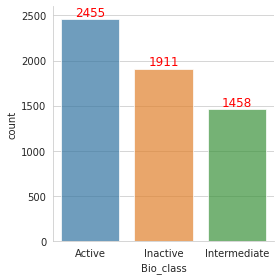

In [ ]:
import math
# Set plotting style
sns.set_style('whitegrid')

# Rounding the integer to the next hundredth value plus an offset of 100
def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100 
sns.factorplot('Bio_class', data=df, kind='count', alpha=0.7, size=4, aspect=1)

# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = df['Bio_class'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')


In [ ]:
X = df.drop(['pIC50','Bio_class'], axis=1)
X

,SubFPC1,SubFPC2,SubFPC3,SubFPC4,SubFPC5,SubFPC6,SubFPC7,SubFPC8,SubFPC9,SubFPC10,...,SubFPC298,SubFPC299,SubFPC300,SubFPC301,SubFPC302,SubFPC303,SubFPC304,SubFPC305,SubFPC306,SubFPC307
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,4.0,5.0,0.0,0.0,0.0,0.0,15.0
1,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,11.0,11.0,5.0,0.0,0.0,0.0,0.0,14.0
2,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,8.0,8.0,5.0,0.0,0.0,0.0,0.0,12.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,3.0,3.0,6.0,0.0,0.0,0.0,0.0,18.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,3.0,4.0,0.0,0.0,0.0,0.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,1.0,10.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,23.0,23.0,13.0,0.0,0.0,0.0,0.0,22.0
5820,1.0,10.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,23.0,23.0,12.0,0.0,0.0,0.0,0.0,20.0
5821,1.0,10.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,25.0,25.0,11.0,0.0,0.0,0.0,0.0,18.0
5822,1.0,10.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,28.0,28.0,13.0,0.0,0.0,0.0,0.0,22.0


In [ ]:
Y = df.Bio_class
Y

0         Active
1         Active
2       Inactive
3         Active
4         Active
          ...   
5819      Active
5820      Active
5821      Active
5822      Active
5823      Active
Name: Bio_class, Length: 5824, dtype: object

In [ ]:
X.shape

(5824, 307)

In [ ]:
Y.shape

(5824,)

In [ ]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,SubFPC1,SubFPC2,SubFPC3,SubFPC4,SubFPC5,SubFPC9,SubFPC12,SubFPC18,SubFPC23,SubFPC26,...,SubFPC287,SubFPC288,SubFPC295,SubFPC296,SubFPC298,SubFPC300,SubFPC301,SubFPC302,SubFPC303,SubFPC307
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.0,0.0,10.0,0.0,0.0,4.0,4.0,5.0,0.0,15.0
1,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,11.0,0.0,0.0,11.0,11.0,5.0,0.0,14.0
2,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,2.0,0.0,11.0,0.0,0.0,8.0,8.0,5.0,0.0,12.0
3,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,2.0,0.0,11.0,0.0,0.0,3.0,3.0,6.0,0.0,18.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,11.0,0.0,0.0,3.0,3.0,4.0,0.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,1.0,10.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,9.0,0.0,0.0,23.0,23.0,13.0,0.0,22.0
5820,1.0,10.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,0.0,0.0,23.0,23.0,12.0,0.0,20.0
5821,1.0,10.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,11.0,0.0,0.0,25.0,25.0,11.0,0.0,18.0
5822,1.0,10.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,10.0,0.0,0.0,28.0,28.0,13.0,0.0,22.0


In [ ]:
Cols = list(X.columns)

In [ ]:
from sklearn import *
X = preprocessing.normalize(X,norm='l2')
X

array([[0.04271788, 0.        , 0.        , ..., 0.21358941, 0.        ,
        0.64076824],
       [0.        , 0.14331487, 0.03582872, ..., 0.17914359, 0.        ,
        0.50160205],
       [0.        , 0.12288479, 0.        , ..., 0.20480798, 0.        ,
        0.49153915],
       ...,
       [0.0221458 , 0.22145801, 0.0442916 , ..., 0.24360381, 0.        ,
        0.39862441],
       [0.01981072, 0.19810721, 0.03962144, ..., 0.25753938, 0.        ,
        0.43583587],
       [0.02134434, 0.2134434 , 0.04268868, ..., 0.29882077, 0.        ,
        0.44823115]])

In [ ]:
X = pd.DataFrame(X, columns =Cols)
X

,SubFPC1,SubFPC2,SubFPC3,SubFPC4,SubFPC5,SubFPC9,SubFPC12,SubFPC18,SubFPC23,SubFPC26,...,SubFPC287,SubFPC288,SubFPC295,SubFPC296,SubFPC298,SubFPC300,SubFPC301,SubFPC302,SubFPC303,SubFPC307
0,0.042718,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.042718,0.0,0.0,...,0.128154,0.0,0.427179,0.0,0.0,0.170872,0.170872,0.213589,0.0,0.640768
1,0.000000,0.143315,0.035829,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.071657,0.0,0.394116,0.0,0.0,0.394116,0.394116,0.179144,0.0,0.501602
2,0.000000,0.122885,0.000000,0.0,0.000000,0.122885,0.0,0.000000,0.0,0.0,...,0.081923,0.0,0.450578,0.0,0.0,0.327693,0.327693,0.204808,0.0,0.491539
3,0.000000,0.000000,0.000000,0.0,0.000000,0.104194,0.0,0.000000,0.0,0.0,...,0.069463,0.0,0.382046,0.0,0.0,0.104194,0.104194,0.208389,0.0,0.625166
4,0.036155,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.072310,0.0,0.397706,0.0,0.0,0.108465,0.108465,0.144620,0.0,0.614636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,0.021452,0.214521,0.042904,0.0,0.021452,0.000000,0.0,0.000000,0.0,0.0,...,0.042904,0.0,0.193069,0.0,0.0,0.493399,0.493399,0.278878,0.0,0.471947
5820,0.022140,0.221404,0.044281,0.0,0.022140,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.199263,0.0,0.0,0.509229,0.509229,0.265684,0.0,0.442807
5821,0.022146,0.221458,0.044292,0.0,0.022146,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.243604,0.0,0.0,0.553645,0.553645,0.243604,0.0,0.398624
5822,0.019811,0.198107,0.039621,0.0,0.019811,0.000000,0.0,0.000000,0.0,0.0,...,0.039621,0.0,0.198107,0.0,0.0,0.554700,0.554700,0.257539,0.0,0.435836


In [ ]:
from sklearn.preprocessing import LabelEncoder
Ly = LabelEncoder()
Ly.fit_transform(Y)

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
Ly.classes_

array(['Active', 'Inactive', 'Intermediate'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, Y_train.shape

((4659, 38), (4659,))

In [ ]:
X_test.shape, Y_test.shape

((1165, 38), (1165,))

In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.23.1
!pip install PyYAML==5.3.1

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 13.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.1 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.1 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 269 kB 22.3 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=cf7d75fc56d7c89ba909aadb4d153148f686012fea0c2ac5c697959bc83d2666
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [ ]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)

100%|██████████| 29/29 [00:08<00:00,  3.30it/s]


In [ ]:
# Performance table of the training set (80% subset)
models_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.99,0.99,None,0.99,0.71
LGBMClassifier,0.99,0.99,None,0.99,1.62
DecisionTreeClassifier,0.99,0.99,None,0.99,0.04
ExtraTreeClassifier,0.99,0.99,None,0.99,0.02
ExtraTreesClassifier,0.99,0.99,None,0.99,0.26
LabelPropagation,0.99,0.99,None,0.99,0.21
LabelSpreading,0.99,0.99,None,0.99,0.32
BaggingClassifier,0.98,0.98,None,0.98,0.14
NuSVC,0.84,0.82,None,0.84,0.36


In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 29/29 [00:05<00:00,  5.50it/s]


In [ ]:
# Performance table of the test set (20% subset)
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.64,0.61,None,0.63,0.25
RandomForestClassifier,0.64,0.61,None,0.63,0.40
LGBMClassifier,0.61,0.59,None,0.61,0.85
NuSVC,0.60,0.58,None,0.60,0.14
BaggingClassifier,0.60,0.57,None,0.59,0.14
SVC,0.61,0.57,None,0.59,0.15
KNeighborsClassifier,0.60,0.57,None,0.59,0.05
LabelPropagation,0.58,0.56,None,0.58,0.09
LabelSpreading,0.58,0.56,None,0.58,0.12
